In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns

In [62]:
gps = pd.read_csv('data/gps_clean.csv')
stations_paths = pd.read_csv('data/stations_paths.csv')

In [63]:
gps.drop(['datetime_diff','distance'], axis=1, inplace=True)
gps = gps.groupby(['TripID','order'], as_index=False).last()
gps.head()

,TripID,order,vehicule_id,line_id,latitude,longitude,datetime,station_id,TripNumber
0,10022_100,1,100,22,36.803965,10.177996,2020-02-26 09:48:48,246,100
1,10022_100,2,100,22,36.813489,10.172298,2020-02-26 09:55:59,247,100
2,10022_100,3,100,22,36.809604,10.161677,2020-02-26 09:58:32,248,100
3,10022_100,4,100,22,36.802855,10.163589,2020-02-26 10:01:31,119,100
4,10022_100,5,100,22,36.798912,10.161757,2020-02-26 10:08:34,288,100


In [64]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036774 entries, 0 to 1036773
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   TripID       1036774 non-null  object 
 1   order        1036774 non-null  int64  
 2   vehicule_id  1036774 non-null  int64  
 3   line_id      1036774 non-null  int64  
 4   latitude     1036774 non-null  float64
 5   longitude    1036774 non-null  float64
 6   datetime     1036774 non-null  object 
 7   station_id   1036774 non-null  int64  
 8   TripNumber   1036774 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 79.1+ MB


In [65]:
stations_paths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   line_id        709 non-null    int64  
 1   station_id     709 non-null    int64  
 2   order          709 non-null    int64  
 3   english_name   709 non-null    object 
 4   french_name    709 non-null    object 
 5   arabic_name    709 non-null    object 
 6   latitude       709 non-null    float64
 7   longitude      709 non-null    float64
 8   path_id        709 non-null    int64  
 9   line_label     709 non-null    object 
 10  tag            709 non-null    int64  
 11  vehicule_type  709 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 66.6+ KB


In [66]:
gps.drop('TripNumber',axis=1,inplace=True)

In [67]:
gps.head()

,TripID,order,vehicule_id,line_id,latitude,longitude,datetime,station_id
0,10022_100,1,100,22,36.803965,10.177996,2020-02-26 09:48:48,246
1,10022_100,2,100,22,36.813489,10.172298,2020-02-26 09:55:59,247
2,10022_100,3,100,22,36.809604,10.161677,2020-02-26 09:58:32,248
3,10022_100,4,100,22,36.802855,10.163589,2020-02-26 10:01:31,119
4,10022_100,5,100,22,36.798912,10.161757,2020-02-26 10:08:34,288


In [68]:
stations_paths.head()

,line_id,station_id,order,english_name,french_name,arabic_name,latitude,longitude,path_id,line_label,tag,vehicule_type
0,1,161,1,CITE EL INTILAKA,CITE EL INTILAKA,حي الإنطلاقة,36.838918,10.117072,8,5,1,2
1,1,160,2,ETTADHAMEN,ETTADHAMEN,التضامن,36.835840,10.117590,8,5,1,2
2,1,105,3,OMRANE SUPÉRIEUR,OMRANE SUPÉRIEUR,العمران الأعلى,36.830582,10.124005,8,5,1,2
3,1,159,4,ETTAHRIR,ETTAHRIR,التحرير,36.829180,10.128620,8,5,1,2
4,1,158,5,LES JASMINS,LES JASMINS,الياسمين,36.825880,10.134540,8,5,1,2


In [69]:
mask = (gps.groupby('line_id').count().TripID > 500).values
selected_lines = (gps.groupby('line_id').count().TripID > 500).index[mask]

In [70]:
stations_paths = stations_paths[stations_paths.line_id.isin(selected_lines)]

## Filter data without missing station records

In [71]:
lineid_nbstations = stations_paths.groupby('line_id').station_id.count().to_dict()

In [72]:
percentage = gps.groupby(['TripID','line_id']).station_id.count()/gps.groupby(['TripID','line_id']).station_id.count().map(lineid_nbstations)

In [73]:
selectedTripID = []
# select trips that matchs at least 60% of the correct path stations to get rid of wrong line_id trips
for x in percentage[percentage.apply(lambda x : True if x >= 0 else False)].index:
    selectedTripID.append(x[0])

In [74]:
data = gps[gps.TripID.isin(selectedTripID)].merge(stations_paths[['path_id','line_label','tag','vehicule_type','line_id']].groupby('line_id').first(), on = 'line_id' )

In [75]:
data.head()

,TripID,order,vehicule_id,line_id,latitude,longitude,datetime,station_id,path_id,line_label,tag,vehicule_type
0,10022_100,1,100,22,36.803965,10.177996,2020-02-26 09:48:48,246,16,32,0,3
1,10022_100,2,100,22,36.813489,10.172298,2020-02-26 09:55:59,247,16,32,0,3
2,10022_100,3,100,22,36.809604,10.161677,2020-02-26 09:58:32,248,16,32,0,3
3,10022_100,4,100,22,36.802855,10.163589,2020-02-26 10:01:31,119,16,32,0,3
4,10022_100,5,100,22,36.798912,10.161757,2020-02-26 10:08:34,288,16,32,0,3


In [76]:
data.shape

(1017715, 12)

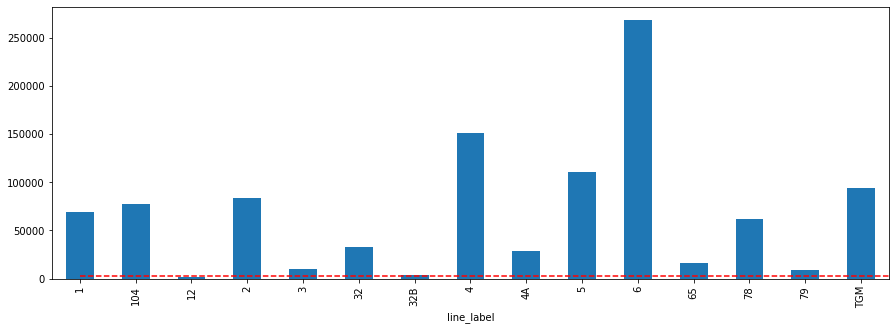

In [77]:
plt.figure(figsize=(15,5))
data.groupby('line_label').TripID.count().plot(kind = 'bar')
plt.plot(np.arange(31), np.ones(31)*3000, 'r--')
plt.show()

### Import weather Data

In [78]:
weather = pd.read_csv('../weather/weatherTunisByHour.csv')

In [79]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8671 entries, 0 to 8670
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 8671 non-null   object 
 1   Date time            8671 non-null   object 
 2   Maximum Temperature  8670 non-null   float64
 3   Minimum Temperature  8670 non-null   float64
 4   Temperature          8670 non-null   float64
 5   Wind Chill           566 non-null    float64
 6   Heat Index           1213 non-null   float64
 7   Precipitation        8671 non-null   float64
 8   Snow Depth           5663 non-null   float64
 9   Wind Speed           8653 non-null   float64
 10  Wind Gust            1983 non-null   float64
 11  Visibility           8650 non-null   float64
 12  Cloud Cover          8667 non-null   float64
 13  Relative Humidity    8670 non-null   float64
 14  Weather Type         272 non-null    object 
 15  Conditions           8670 non-null   o

In [80]:
weather.isnull().sum()*100/weather.shape[0]

Name                    0.000000
Date time               0.000000
Maximum Temperature     0.011533
Minimum Temperature     0.011533
Temperature             0.011533
Wind Chill             93.472495
Heat Index             86.010841
Precipitation           0.000000
Snow Depth             34.690347
Wind Speed              0.207589
Wind Gust              77.130665
Visibility              0.242187
Cloud Cover             0.046131
Relative Humidity       0.011533
Weather Type           96.863107
Conditions              0.011533
dtype: float64

In [81]:
#drop
weather.drop(['Weather Type', 'Wind Gust', 'Snow Depth', 'Heat Index', 'Name', 'Wind Chill', 'Maximum Temperature', 'Minimum Temperature'], axis=1, inplace=True)
weather.head()

,Date time,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
0,01/01/2020 00:00:00,8.0,0.0,5.4,10.0,36.1,70.72,Partially cloudy
1,01/01/2020 01:00:00,8.0,0.4,7.6,10.0,26.9,70.93,"Rain, Partially cloudy"
2,01/01/2020 02:00:00,7.0,0.0,9.3,10.0,27.3,75.75,Partially cloudy
3,01/01/2020 03:00:00,7.0,0.0,11.1,10.0,27.3,75.75,Partially cloudy
4,01/01/2020 04:00:00,8.0,0.0,11.1,10.0,49.4,76.06,Partially cloudy


In [82]:
#transform to date time
weather['Date time'] = weather['Date time'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y %H:%M:%S'))

In [83]:
weather.head()

,Date time,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
0,2020-01-01 00:00:00,8.0,0.0,5.4,10.0,36.1,70.72,Partially cloudy
1,2020-01-01 01:00:00,8.0,0.4,7.6,10.0,26.9,70.93,"Rain, Partially cloudy"
2,2020-01-01 02:00:00,7.0,0.0,9.3,10.0,27.3,75.75,Partially cloudy
3,2020-01-01 03:00:00,7.0,0.0,11.1,10.0,27.3,75.75,Partially cloudy
4,2020-01-01 04:00:00,8.0,0.0,11.1,10.0,49.4,76.06,Partially cloudy


In [84]:
weather.Conditions.fillna('nan', inplace=True)

In [85]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
weather.Conditions = encoder.fit_transform(weather.Conditions)

In [86]:
data['datetime'] = data['datetime'].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data['datetime_diff'] = data.groupby(['TripID']).datetime.diff().shift(-1).dt.total_seconds()

In [87]:
#date features
data['hour']  = data['datetime'].dt.hour
data['quarter'] = data['datetime'].dt.quarter
data['weekday'] = data['datetime'].dt.weekday
#weekday or weekend
data['service_class'] = data['datetime'].dt.weekday.apply(lambda x : 1 if x in [5,6] else 0)

In [88]:
weather = weather.rename({'Date time': 'datetime'}, axis = 1)

In [89]:
weather['datetime'] = weather['datetime'].astype(str).apply(lambda x : x[:-6])
data['datetime'] = data['datetime'].astype(str).apply(lambda x : x[:-6])

In [90]:
weather.reset_index(drop = True)
data.reset_index(drop = True);

In [91]:
data = data.merge(weather, on ='datetime', how='left').drop_duplicates()

In [95]:
#add feature Distance Traveled and distance diff
#cummulative distance travelled by the bus to reach the bus stop
data = data.sort_values(['TripID','datetime'])
data['prev_latitude']  = data.groupby('TripID')['latitude'].shift(1)
data['prev_longitude'] = data.groupby('TripID')['longitude'].shift(1)

In [96]:
def haversine_distance(*x):
    if np.isnan(x[2]) or np.isnan(x[3]):
        return 0
    R = 6378137
    #convert to raduis
    lat1  = x[0] * np.pi/180
    long1 = x[1] * np.pi/180
    lat2  = x[2] * np.pi/180
    long2 = x[3] * np.pi/180
    #calculate haversine distance
    delta_longitude = long1 - long2
    delta_latitude = lat1 - lat2
    a = (np.sin(delta_latitude/2)**2) + np.cos(lat1)*np.cos(lat2)*(np.sin(delta_longitude/2)**2)
    c = 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    distance = R*c
    return int(distance)

In [97]:
data['distance_diff'] = data[['latitude','longitude','prev_latitude','prev_longitude']].apply(lambda x : haversine_distance(*x), axis=1)

In [98]:
data.drop(['latitude','longitude','prev_latitude','prev_longitude'], axis=1, inplace=True)

In [99]:
data['distance_traveled'] = data.groupby('TripID').distance_diff.cumsum()

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017715 entries, 0 to 1062354
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   TripID             1017715 non-null  object 
 1   order              1017715 non-null  int64  
 2   vehicule_id        1017715 non-null  int64  
 3   line_id            1017715 non-null  int64  
 4   datetime           1017715 non-null  object 
 5   station_id         1017715 non-null  int64  
 6   path_id            1017715 non-null  int64  
 7   line_label         1017715 non-null  object 
 8   tag                1017715 non-null  int64  
 9   vehicule_type      1017715 non-null  int64  
 10  datetime_diff      907768 non-null   float64
 11  hour               1017715 non-null  int64  
 12  quarter            1017715 non-null  int64  
 13  weekday            1017715 non-null  int64  
 14  service_class      1017715 non-null  int64  
 15  Temperature        883615 non-nu

In [103]:
data = data.sort_values(['TripID','datetime'])

In [104]:
data.to_csv('data/data.csv', index = False)

In [132]:
selected_features = ['TripID','datetime','order','path_id','line_id','vehicule_type','datetime_diff','hour','quarter','weekday','distance_traveled','Temperature','Visibility','Relative Humidity','Wind Speed','Precipitation','Conditions']

In [133]:
data = data[selected_features]
data.shape

(1017715, 17)